In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Pet Ownership and Mental Health.csv to Pet Ownership and Mental Health.csv


In [14]:
f_data = pd.read_csv('Pet Ownership and Mental Health.csv')
f_data.head()

,Timestamp,Username,Do you currently own a pet?,What type of pet(s) do you own?,How long have you owned your pet?,How often do you feel your pet has a positive impact on your mood?,Have you ever felt more relaxed or calm after spending time with your pet?,Do you feel less lonely due to the companionship of your pet?,Do you believe that owning a pet improves your overall mental health?
0,2025/03/14 2:21:14 PM GMT+2,ykhafagy79@gmail.com,Yes,Dog,1-3 years,Always,Yes,Yes,Yes
1,2025/03/14 4:02:55 PM GMT+2,23-101315@students.eui.edu.eg,Yes,Cat,1-3 years,Always,Yes,Yes,Yes
2,2025/03/18 10:22:20 PM GMT+2,23-101326@students.eui.edu.eg,Yes,Dog,Less than 6 months,Often,Yes,Yes,Yes
3,2025/03/19 12:34:02 PM GMT+2,23-101266@students.eui.edu.eg,Yes,Cat,6 months to 1 year,Always,No,Sometimes,No
4,2025/03/19 12:34:35 PM GMT+2,23-101266@students.eui.edu.eg,Yes,Dog,More than 3 years,Often,Yes,Yes,Not sure


In [21]:
f_data.columns = f_data.columns.str.strip()

In [22]:
categorical_cols = f_data.select_dtypes(include=['object']).columns
f_data[categorical_cols] = f_data[categorical_cols].fillna("No Response")

In [32]:
f_data.to_csv("Cleaned_Pet_Ownership_Data.csv", index=False)
print("\nCleaned dataset saved as 'Cleaned_Pet_Ownership_Data.csv'")


Cleaned dataset saved as 'Cleaned_Pet_Ownership_Data.csv'


In [31]:
f_data.isnull().sum()

,0
Timestamp,0
Username,0
Do you currently own a pet?,0
What type of pet(s) do you own?,0
How long have you owned your pet?,0
How often do you feel your pet has a positive impact on your mood?,0
Have you ever felt more relaxed or calm after spending time with your pet?,0
Do you feel less lonely due to the companionship of your pet?,0
Do you believe that owning a pet improves your overall mental health?,0


In [33]:
f_data.isna().any()

,0
Timestamp,False
Username,False
Do you currently own a pet?,False
What type of pet(s) do you own?,False
How long have you owned your pet?,False
How often do you feel your pet has a positive impact on your mood?,False
Have you ever felt more relaxed or calm after spending time with your pet?,False
Do you feel less lonely due to the companionship of your pet?,False
Do you believe that owning a pet improves your overall mental health?,False


In [4]:
df = pd.read_csv(next(iter(uploaded)))

In [5]:
df.columns = df.columns.str.strip()
df.rename(columns={
    "Do you currently own a pet?": "Owns_Pet",
    "What type of pet(s) do you own?": "Pet_Type",
    "How long have you owned your pet?": "Pet_Ownership_Duration",
    "How often do you feel your pet has a positive impact on your mood?": "Mood_Impact",
    "Have you ever felt more relaxed or calm after spending time with your pet?": "Relaxation_Effect",
    "Do you feel less lonely due to the companionship of your pet?": "Loneliness_Reduction",
    "Do you believe that owning a pet improves your overall mental health?": "Mental_Health_Benefit"
}, inplace=True)

In [6]:
df.drop(columns=["Timestamp", "Username"], inplace=True)

In [46]:
df.dropna(inplace=True)

<ipython-input-46-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [35]:
descriptive_stats = df_clean.describe(include='all')
print("\nDescriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
       Owns_Pet Pet_Type Pet_Ownership_Duration Mood_Impact Relaxation_Effect  \
count        50       50                     50          50                50   
unique        1        3                      5           6                 3   
top         Yes      Dog     6 months to 1 year      Always               Yes   
freq         50       26                     17          22                39   

       Loneliness_Reduction Mental_Health_Benefit  
count                    50                    50  
unique                    4                     4  
top                     Yes                   Yes  
freq                     21                    27  


<ipython-input-55-238c699e6615>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean["Pet_Type"], palette="viridis")


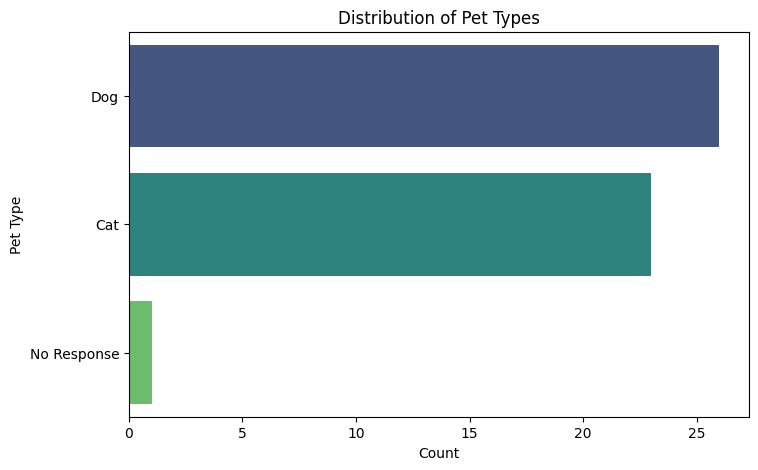


This bar chart shows the distribution of different pet types owned by the respondents. The most commonly owned pet can be easily identified from this visualization.


In [55]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df_clean["Pet_Type"], palette="viridis")
plt.title("Distribution of Pet Types")
plt.xlabel("Count")
plt.ylabel("Pet Type")
plt.show()
print("\nThis bar chart shows the distribution of different pet types owned by the respondents. The most commonly owned pet can be easily identified from this visualization.")

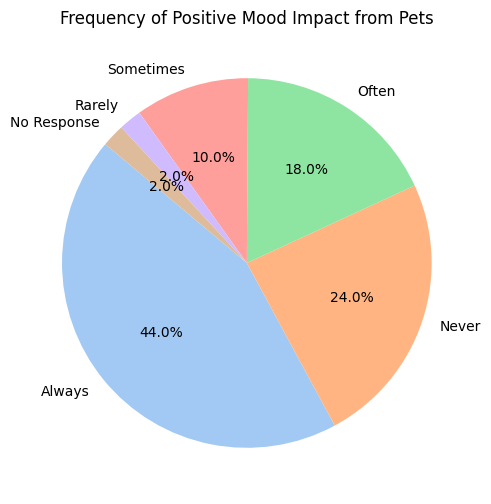


This pie chart represents how frequently respondents feel that their pet has a positive impact on their mood. It helps us understand the general perception of pet influence on emotional well-being.


In [37]:
plt.figure(figsize=(6, 6))
df_clean["Mood_Impact"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Frequency of Positive Mood Impact from Pets")
plt.ylabel("")
plt.show()
print("\nThis pie chart represents how frequently respondents feel that their pet has a positive impact on their mood. It helps us understand the general perception of pet influence on emotional well-being.")

<ipython-input-38-5370e3534960>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_clean["Mental_Health_Benefit"], palette="coolwarm")


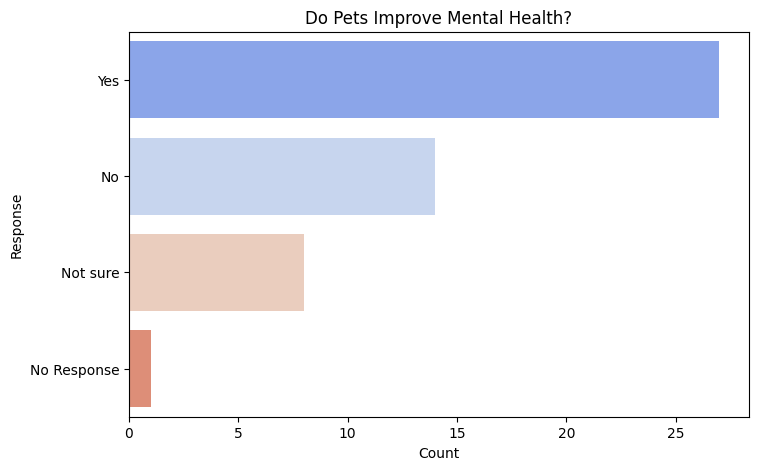


This bar chart illustrates the distribution of responses to whether pet ownership improves mental health. If the majority agree, it suggests a strong belief in the benefits of pet companionship.


In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df_clean["Mental_Health_Benefit"], palette="coolwarm")
plt.title("Do Pets Improve Mental Health?")
plt.xlabel("Count")
plt.ylabel("Response")
plt.show()
print("\nThis bar chart illustrates the distribution of responses to whether pet ownership improves mental health. If the majority agree, it suggests a strong belief in the benefits of pet companionship.")

In [39]:
print("Conclusion:")
print("The analysis of the survey responses suggests that pet ownership has a generally positive effect on mental health. Most respondents report feeling less lonely and experiencing improved mood due to their pets.")

Conclusion:
The analysis of the survey responses suggests that pet ownership has a generally positive effect on mental health. Most respondents report feeling less lonely and experiencing improved mood due to their pets.


In [40]:
print("Potential Issues:")
print("1. The survey sample may not be representative of the general population, potentially leading to biased results.")
print("2. Self-reported data may introduce response bias, as individuals might overstate or understate the impact of their pets.")
print("3. The survey does not account for other factors influencing mental health, which might confound the observed effects of pet ownership.")

Potential Issues:
1. The survey sample may not be representative of the general population, potentially leading to biased results.
2. Self-reported data may introduce response bias, as individuals might overstate or understate the impact of their pets.
3. The survey does not account for other factors influencing mental health, which might confound the observed effects of pet ownership.
